In [2]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Part 1

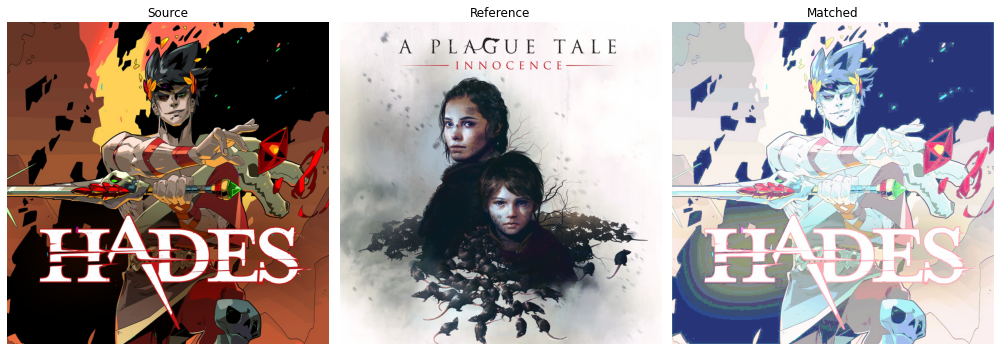

In [12]:
reference = plt.imread('A Plague Tale.jpg')
source = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference, multichannel=True)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [4]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  
  ### YOUR CODE ###
  # START
  bins_count = 255
  channels_count = src_image.shape[-1]
  matched = src_image.copy()
  for channel in range(channels_count):
    src_hist, bins = np.histogram(src_image[..., channel].flatten(), bins_count)
    ref_hist, bins = np.histogram(ref_image[..., channel].flatten(), bins_count)

    # cumulative sum
    cdfsrc = src_hist.cumsum() 
    cdfsrc = 255 * cdfsrc // cdfsrc[-1]

    cdfref = ref_hist.cumsum()
    cdfref = 255 * cdfref // cdfref[-1]

    src_equ = np.interp(src_image[:,:,channel].flatten(),bins[:-1],cdfsrc)
    matched_channel = np.interp(src_equ,cdfref, bins[:-1])

    matched[...,channel] = matched_channel.reshape((src_image.shape[0],src_image.shape[1]))

  output_image = matched
  # END

  return output_image

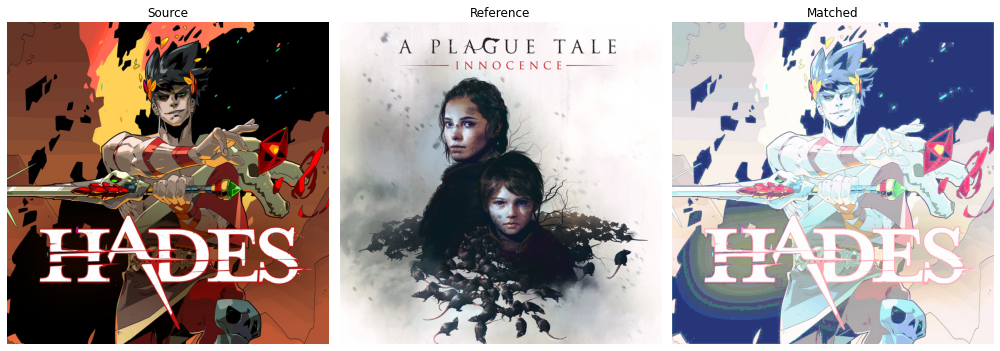

In [5]:
ref_image = plt.imread('A Plague Tale.jpg')
src_image = plt.imread('Hades.jpg')
res_image = hist_matching(src_image, ref_image)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(src_image)
ax1.set_title('Source')
ax2.imshow(ref_image)
ax2.set_title('Reference')
ax3.imshow(res_image)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

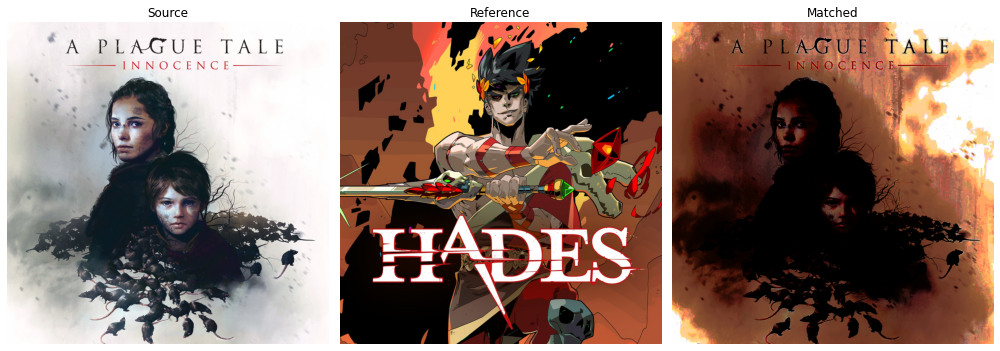

In [6]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

matched = match_histograms(source, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

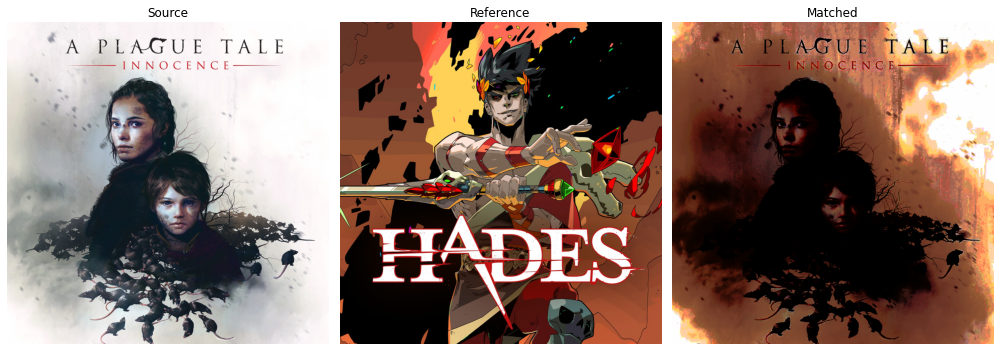

In [7]:
src_image = plt.imread('A Plague Tale.jpg')
ref_image = plt.imread('Hades.jpg')
res_image = hist_matching(src_image, ref_image)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(src_image)
ax1.set_title('Source')
ax2.imshow(ref_image)
ax2.set_title('Reference')
ax3.imshow(res_image)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()